In [163]:
import pandas as pd
import warnings
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:80% !important; }</style>"))
warnings.filterwarnings('ignore')
train=pd.read_csv("train_data.csv")
test=pd.read_csv("test_data.csv")

df=pd.concat([train,test],sort=False)

In [164]:
df.isnull().sum()

id                   0
position             0
age                  0
area                 0
sex                  0
partner              0
num_child            0
education            0
service_length       0
study_time           0
commute              0
overtime             0
salary            9000
dtype: int64

In [165]:
for i in df.columns:
    print(i)
    print(df[i].unique())


id
[    0     1     2 ... 20997 20998 20999]
position
[1 2 0 3 4]
age
[44 31 36 22 25 23 32 21 43 46 27 50 24 35 26 33 39 48 29 41 55 40 20 53
 34 42 52 45 56 49 47 28 54 30 37 18 51 38 19 57 59 63 58 61 62 65 60 66
 67 64]
area
['愛知県' '奈良県' '山口県' '東京都' '鹿児島県' '兵庫県' '神奈川県' '宮城県' '茨城県' '岩手県' '鳥取県' '岡山県'
 '愛媛県' '新潟県' '島根県' '和歌山県' '高知県' '石川県' '熊本県' '埼玉県' '佐賀県' '香川県' '宮崎県' '福島県'
 '大阪府' '大分県' '岐阜県' '長崎県' '広島県' '北海道' '富山県' '山形県' '徳島県' '青森県' '千葉県' '滋賀県'
 '沖縄県' '三重県' '長野県' '京都府' '栃木県' '福井県' '山梨県' '秋田県' '静岡県' '群馬県' '福岡県']
sex
[2 1]
partner
[1 0]
num_child
[2 0 3 4 1 5 6 7 8 9]
education
[1 0 2 4 3]
service_length
[24 13 14  4  5  3 25  9 30  6 17  0 11 19 28  8 21  2 37 32 18  7  1 35
 20 16 33 26 27 10 22 36 29 34 12 31 15 23 43 39 40 38 41 45 44 42 47 49]
study_time
[ 2.  9.  4.  3.  5. 11.  7.  0.  6. 10.  1.  8. 20. 12. 17. 13. 18. 14.
 15. 16. 19. 21. 24.]
commute
[1.6 0.7 0.4 0.2 1.3 1.7 0.1 0.5 1.4 0.9 0.3 2.1 1.8 1.5 0.6 1.2 0.8 1.1
 1.9 2.2 4.3 2.3 1.  3.6 2.  2.5 2.4 2.9 3.3 4.2 4.  2

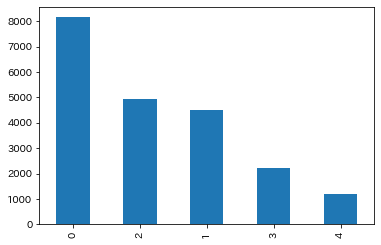

In [166]:
train['position'].value_counts().plot.bar()

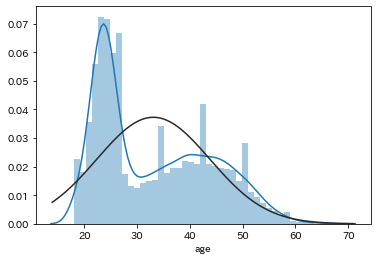

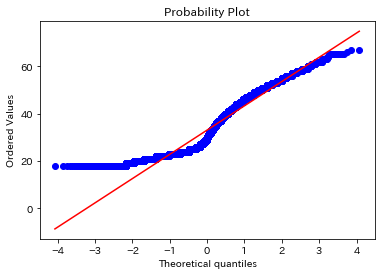

In [167]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df["age"].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df["age"], plot=plt)

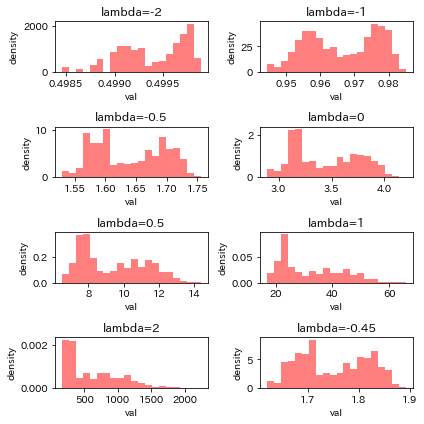

In [147]:

from scipy import stats

fig = plt.figure(figsize=(6.0, 6.0))
aaa=pd.DataFrame()
list_lambda = [-2, -1, -0.5, 0, 0.5, 1, 2]
for i, i_lambda in enumerate(list_lambda):
    aaa[ 'val_'+str(i) ] = stats.boxcox( df.age, lmbda = i_lambda )
    fig.add_subplot(4, 2, i+1).hist(aaa['val_'+str(i)], bins=20, color='r', alpha=0.5, density=True)
    plt.title("lambda="+str(list_lambda[i]))
    plt.xlabel('val')
    plt.ylabel('density')

aaa[ 'val_auto' ], best_lambda = stats.boxcox( df.age)
fig.add_subplot(4, 2, 8).hist(aaa['val_auto'], bins=20, color='r', alpha=0.5, density=True)
plt.title("lambda="+str(round(best_lambda, 2)))
plt.xlabel('val')
plt.ylabel('density')

fig.tight_layout()
fig.show()
plt.show()

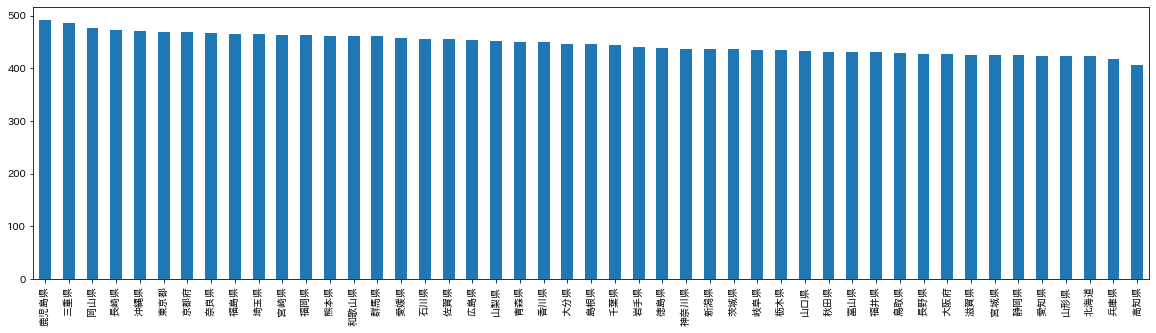

In [148]:
train['area'].value_counts().plot.bar(figsize=(20, 5))


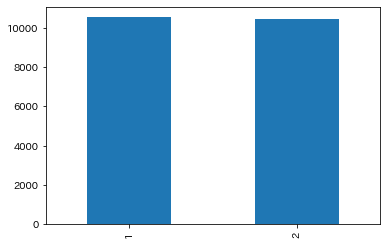

In [81]:
train['sex'].value_counts().plot.bar()

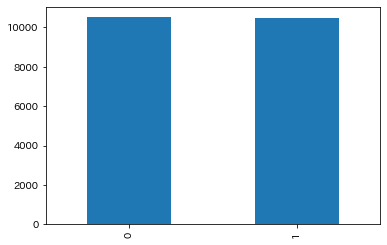

In [82]:
train['partner'].value_counts().plot.bar()

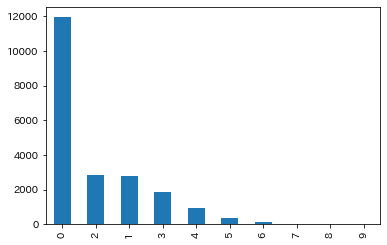

In [83]:
train['num_child'].value_counts().plot.bar()

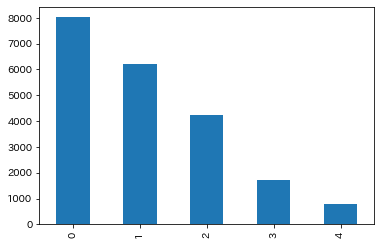

In [84]:
train['education'].value_counts().plot.bar()

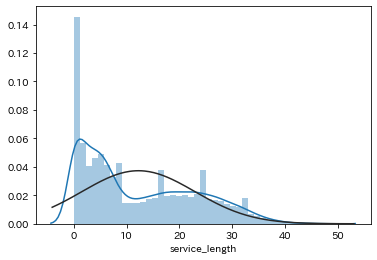

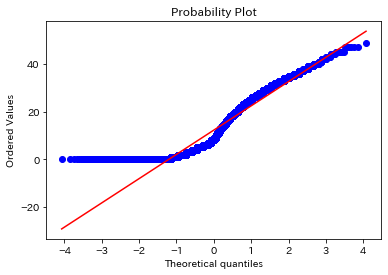

In [132]:
sns.distplot(df['service_length'].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df['service_length'], plot=plt)

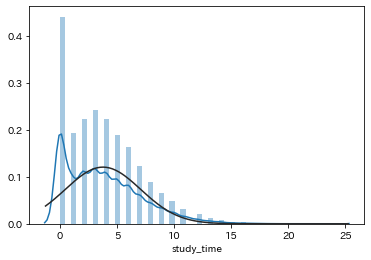

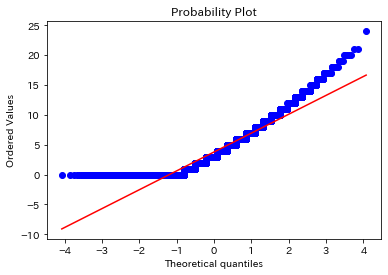

In [137]:


sns.distplot(df['study_time'].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df['study_time'], plot=plt)

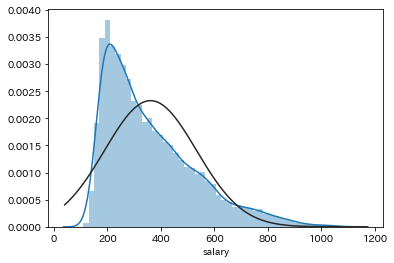

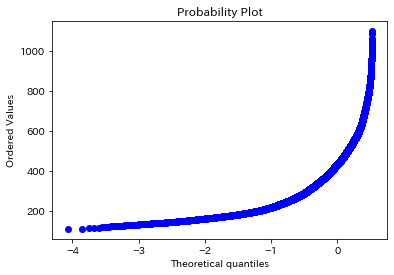

In [150]:
sns.distplot(df.salary.dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df.salary, plot=plt)

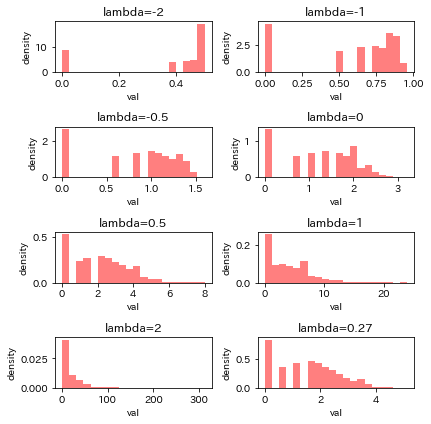

In [151]:
fig = plt.figure(figsize=(6.0, 6.0))
aaa=pd.DataFrame()
list_lambda = [-2, -1, -0.5, 0, 0.5, 1, 2]
for i, i_lambda in enumerate(list_lambda):
    aaa[ 'val_'+str(i) ] = stats.boxcox( df.study_time+1, lmbda = i_lambda )
    fig.add_subplot(4, 2, i+1).hist(aaa['val_'+str(i)], bins=20, color='r', alpha=0.5, density=True)
    plt.title("lambda="+str(list_lambda[i]))
    plt.xlabel('val')
    plt.ylabel('density')

aaa[ 'val_auto' ], best_lambda = stats.boxcox( df.study_time+1)
fig.add_subplot(4, 2, 8).hist(aaa['val_auto'], bins=20, color='r', alpha=0.5, density=True)
plt.title("lambda="+str(round(best_lambda, 2)))
plt.xlabel('val')
plt.ylabel('density')

fig.tight_layout()
fig.show()
plt.show()

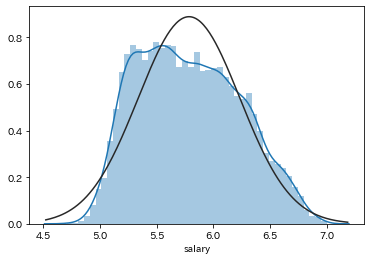

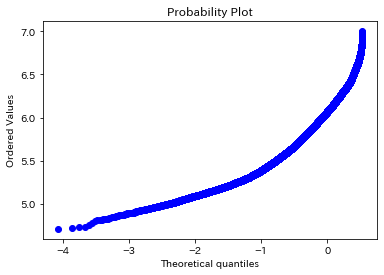

In [168]:
df.salary=np.log(df.salary)
#transformed histogram and normal probability plot
sns.distplot(df.salary.dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df.salary, plot=plt)

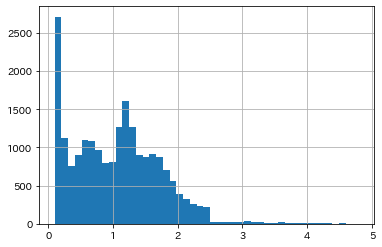

In [152]:
train['commute'].hist(bins=45)

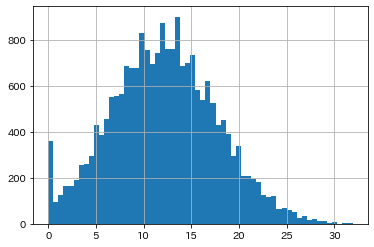

In [153]:
train['overtime'].hist(bins=60)

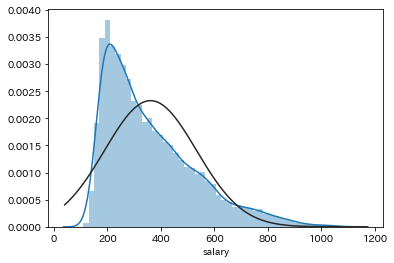

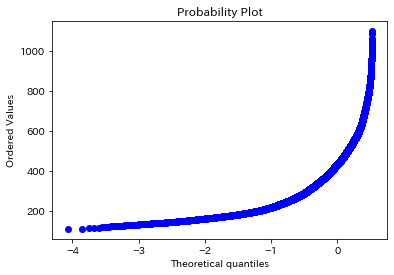

In [154]:


sns.distplot(df['salary'].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df['salary'], plot=plt)

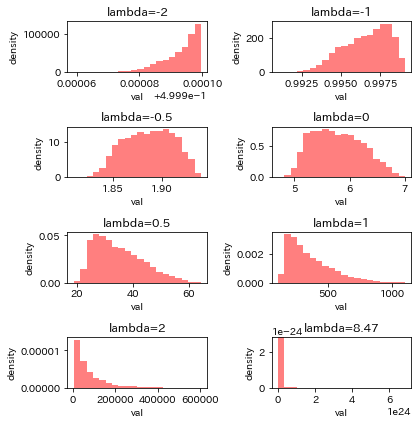

In [155]:
fig = plt.figure(figsize=(6.0, 6.0))
aaa=pd.DataFrame()
list_lambda = [-2, -1, -0.5, 0, 0.5, 1, 2]
for i, i_lambda in enumerate(list_lambda):
    aaa[ 'val_'+str(i) ] = stats.boxcox( df.salary, lmbda = i_lambda )
    fig.add_subplot(4, 2, i+1).hist(aaa['val_'+str(i)], bins=20, color='r', alpha=0.5, density=True)
    plt.title("lambda="+str(list_lambda[i]))
    plt.xlabel('val')
    plt.ylabel('density')

aaa[ 'val_auto' ], best_lambda = stats.boxcox( df.salary)
fig.add_subplot(4, 2, 8).hist(aaa['val_auto'], bins=20, color='r', alpha=0.5, density=True)
plt.title("lambda="+str(round(best_lambda, 2)))
plt.xlabel('val')
plt.ylabel('density')

fig.tight_layout()
fig.show()
plt.show()

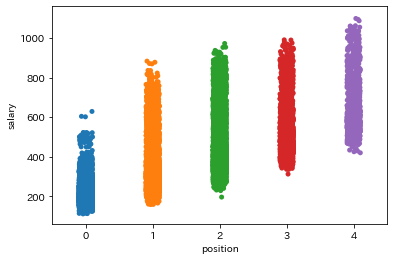

In [156]:
sns.stripplot(x="position",y="salary",data=train)#正の相関あり?

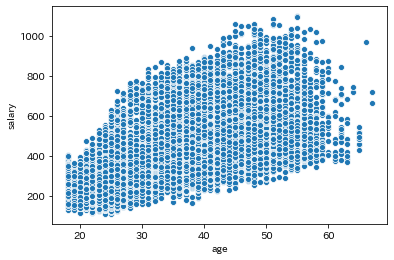

In [157]:
sns.scatterplot(x="age",y="salary",data=train)#正の相関

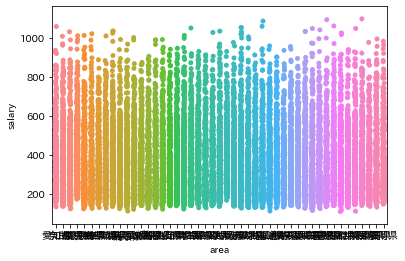

In [92]:
sns.stripplot(x="area",y="salary",data=train)#やや地域差はある

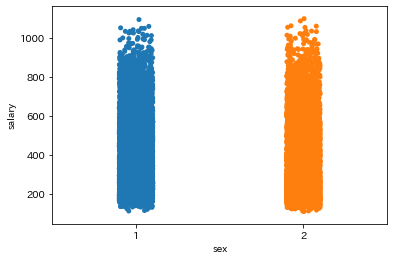

In [93]:
sns.stripplot(x="sex",y="salary",data=train)#そんなに性差はなさそう

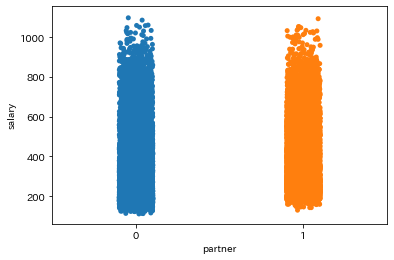

In [94]:
sns.stripplot(x="partner",y="salary",data=train)#正の相関

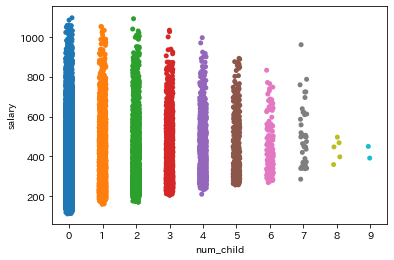

In [95]:
sns.stripplot(x="num_child",y="salary",data=train)#子が多くなるにつれて給与の幅が縮まりそう

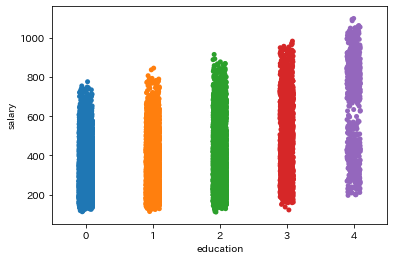

In [96]:
sns.stripplot(x="education",y="salary",data=train)#正の相関

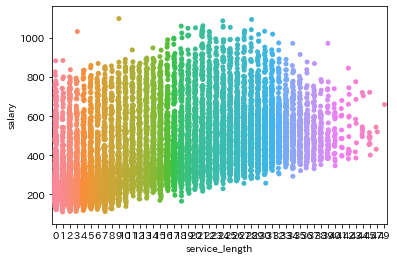

In [97]:
sns.stripplot(x="service_length",y="salary",data=train)#正の相関

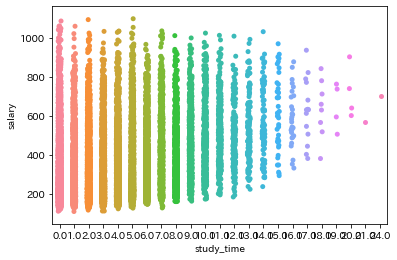

In [98]:
sns.stripplot(x="study_time",y="salary",data=train)#正の相関

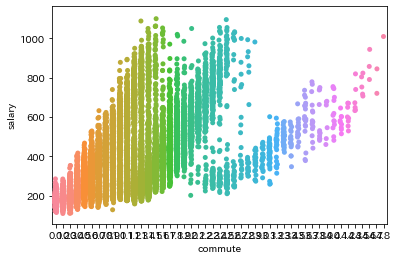

In [99]:
sns.stripplot(x="commute",y="salary",data=train)#意味不明

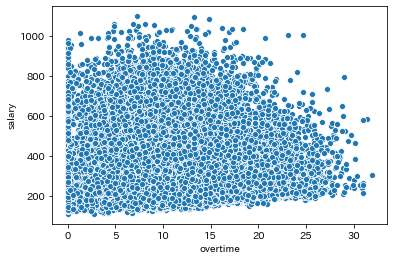

In [100]:
sns.scatterplot(x="overtime",y="salary",data=train)#正の相関

In [169]:
arealist=list(train.groupby("area").mean().salary.sort_values().index)
areadic={}
for i,area in enumerate(arealist):
    areadic[area]=i+1
df.area=df.area.map(areadic)

In [170]:
from sklearn.model_selection import train_test_split, GridSearchCV

train=df.dropna().drop("id",axis=1)
test=df[df.salary.isnull()].drop("id",axis=1)
test= test.drop(["salary",],axis=1)
X = train.drop(["salary"],axis=1)

#　目的変数に家賃単価を代入する
y = train.salary
train_X, valid_X,train_y, valid_y = train_test_split(X,y,test_size=0.2,random_state=43)

In [175]:
#重回帰分析
import sklearn
from sklearn.linear_model import LinearRegression as LR

model=LR()

model.fit(train_X, train_y)

linearpred=model.predict(valid_X)
model.score(valid_X,valid_y)

0.8350405884659126

In [176]:
from sklearn.ensemble import RandomForestRegressor as RFR
import numpy as np
from sklearn.metrics import mean_absolute_error

rg = RFR(n_jobs=-1, random_state=2525)
 
rg.fit(train_X,train_y)
print(rg.score(valid_X,valid_y))
from sklearn.metrics import mean_squared_error
print("randomforest :"+str(mean_absolute_error(np.exp(valid_y),np.exp(rg.predict(valid_X)))))

0.9550344804492534
randomforest :23.71994138734711


In [178]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import optuna

class RidgeCV():
    model_cls = Ridge

    def __init__(self, n_trials=100):
        self.n_trials = n_trials

    def fit(self, X, y):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            y = pd.DataFrame(y)
        elif isinstance(X, pd.DataFrame):
            X = X.reset_index(drop=True)
            y = y.reset_index(drop=True)

        self.X = X
        self.y = y

        study = optuna.create_study(direction='maximize')
        study.optimize(self, n_trials=self.n_trials)
        self.best_trial = study.best_trial

        print()
        print("Best score:", round(self.best_trial.value, 2))
        print("Best params:", self.best_trial.params)
        print()

        self.best_model = self.model_cls(**self.best_trial.params)
        self.best_model.fit(self.X, self.y)

    def predict(self, X):
        if isinstance(X, pd.Series):
            X = pd.DataFrame(X.values.reshape(1, -1))
        elif isinstance(X, np.ndarray):
            X = pd.DataFrame(X)

        return self.best_model.predict(X)

    def score(self, X, y):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            y = pd.DataFrame(y)

        return self.best_model.score(X, y)

    def kfold_cv(self, model, splits=5):
        scores = []

        kf = KFold(n_splits=splits, shuffle=True)
        for train_index, test_index in kf.split(self.X):
            X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
            y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
            model.fit(X_train, y_train)
            scores.append(model.score(X_test, y_test))

        score = np.array(scores).mean()
        return score

import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

class XGBRegressorCV(RidgeCV):
    model_cls = xgb.XGBRegressor

    def __call__(self, trial):
        booster = trial.suggest_categorical('booster', ['gbtree', 'dart'])
        alpha = trial.suggest_loguniform('alpha', 1e-8, 1.0)

        max_depth = trial.suggest_int('max_depth', 1, 9)
        eta = trial.suggest_loguniform('eta', 1e-8, 1.0)
        gamma = trial.suggest_loguniform('gamma', 1e-8, 1.0)
        grow_policy = trial.suggest_categorical(
            'grow_policy', ['depthwise', 'lossguide'])

        if booster == 'gbtree':
            model = self.model_cls(silent=1, booster=booster,
                                   alpha=alpha, max_depth=max_depth, eta=eta,
                                   gamma=gamma, grow_policy=grow_policy)
        elif booster == 'dart':
            sample_type = trial.suggest_categorical('sample_type',
                                                    ['uniform', 'weighted'])
            normalize_type = trial.suggest_categorical('normalize_type',
                                                       ['tree', 'forest'])
            rate_drop = trial.suggest_loguniform('rate_drop', 1e-8, 1.0)
            skip_drop = trial.suggest_loguniform('skip_drop', 1e-8, 1.0)
            model = self.model_cls(silent=1, booster=booster,
                                   alpha=alpha, max_depth=max_depth, eta=eta,
                                   gamma=gamma, grow_policy=grow_policy,
                                   sample_type=sample_type,
                                   normalize_type=normalize_type,
                                   rate_drop=rate_drop, skip_drop=skip_drop)

        score = self.kfold_cv(model)
        return score

xgbr = XGBRegressorCV(n_trials=20)
xgbr.fit(train_X, train_y)


[I 2019-11-09 19:07:10,923] Finished trial#0 resulted in value: 0.9571068416764351. Current best value is 0.9571068416764351 with parameters: {'booster': 'dart', 'alpha': 8.83537670806601e-08, 'max_depth': 6, 'eta': 0.003718738951381642, 'gamma': 1.954683796758943e-06, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 5.995087534020831e-05, 'skip_drop': 0.00778389593859243}.
[I 2019-11-09 19:07:32,845] Finished trial#1 resulted in value: 0.9354224801359348. Current best value is 0.9571068416764351 with parameters: {'booster': 'dart', 'alpha': 8.83537670806601e-08, 'max_depth': 6, 'eta': 0.003718738951381642, 'gamma': 1.954683796758943e-06, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 5.995087534020831e-05, 'skip_drop': 0.00778389593859243}.
[I 2019-11-09 19:07:43,499] Finished trial#2 resulted in value: 0.9566980151216841. Current best value is 0.9571068416764351 with parameters: {'booster': 'd

KeyboardInterrupt: 

In [179]:
xgbr.fit(X, y)

pred=np.exp(xgbr.predict(test))

[I 2019-11-09 19:08:08,685] Finished trial#0 resulted in value: 0.9483201506795403. Current best value is 0.9483201506795403 with parameters: {'booster': 'gbtree', 'alpha': 0.05253013566657841, 'max_depth': 4, 'eta': 1.0596563650846799e-07, 'gamma': 0.03133789732696262, 'grow_policy': 'depthwise'}.
[I 2019-11-09 19:08:12,124] Finished trial#1 resulted in value: 0.9361219949962969. Current best value is 0.9483201506795403 with parameters: {'booster': 'gbtree', 'alpha': 0.05253013566657841, 'max_depth': 4, 'eta': 1.0596563650846799e-07, 'gamma': 0.03133789732696262, 'grow_policy': 'depthwise'}.
[I 2019-11-09 19:09:00,481] Finished trial#2 resulted in value: 0.9595741706445962. Current best value is 0.9595741706445962 with parameters: {'booster': 'dart', 'alpha': 0.4201991799213496, 'max_depth': 7, 'eta': 2.2729653803151184e-07, 'gamma': 0.017682615185050043, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 7.285299410005427e-05, 'skip_drop':


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 4.689916828375281e-07, 'max_depth': 9, 'eta': 0.0012131331287137512, 'gamma': 2.2994113943713087e-07, 'grow_policy': 'lossguide'}

[19:13:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [182]:
sub = pd.DataFrame(pd.read_csv("test_data.csv")['id'])
sub["y"] = list(pred)
sub.to_csv("submission.csv", index = False)